# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [6]:
# WRITE YOUR CODE HERE

#how do you calculate the gaussian noise term?
#calculating 100 times for 100 different variables

beta_0 = 2
beta_1 = 83
beta_2 = 3
beta_3 = 47

X.t  <- rnorm(100, mean = 0)
E.t  <- rnorm(100, mean = 0) #Do not think this term is correct
E.t  <- jitter(E.t)

output.t =  beta_0 + (X.t*beta_1) + (beta_2*(X.t)^2) + (beta_3*(X.t)^3) + E.t

dat  <- data.frame(X = X.t,  Y = output.t, Epsilon = E.t)

#head(output.t)
#length(output.t)

#head(X_test)
#plot(X_test)

#?rnorm

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [4]:
install.packages("leaps")
library(leaps)
library(tidyverse)

Installing package into 'C:/Users/roman/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roman\AppData\Local\Temp\RtmpmEpOiC\downloaded_packages


Warning message:
"package 'leaps' was built under R version 4.2.3"
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [43]:
head(dat)

dat_10  <- dat %>% 
    slice(1:10)

dim(dat_10)
        
#dim(dat)
#dim(dat_10)
regfit_10  = regsubsets(Y~., select(dat_10, c(X, Y, Epsilon)))
reg.summary  <- summary(regfit_10)
print(reg.summary)

,X,Y,Epsilon
,<dbl>,<dbl>,<dbl>
1,2.1369510,651.29422,-0.4225677
2,-0.2057144,-16.36943,-1.0129297
3,0.3610640,33.02048,-1.5512595
4,-1.9409722,-491.66822,-0.1884051
5,0.3000523,28.68123,0.2371354
6,1.7569047,413.01762,1.0504713


[1] 10  3

Subset selection object
Call: regsubsets.formula(Y ~ ., select(dat_10, c(X, Y, Epsilon)))
2 Variables  (and intercept)
        Forced in Forced out
X           FALSE      FALSE
Epsilon     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: exhaustive
         X   Epsilon
1  ( 1 ) "*" " "    
2  ( 1 ) "*" "*"    


In [29]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

In [ ]:
# WRITE YOUR CODE HERE



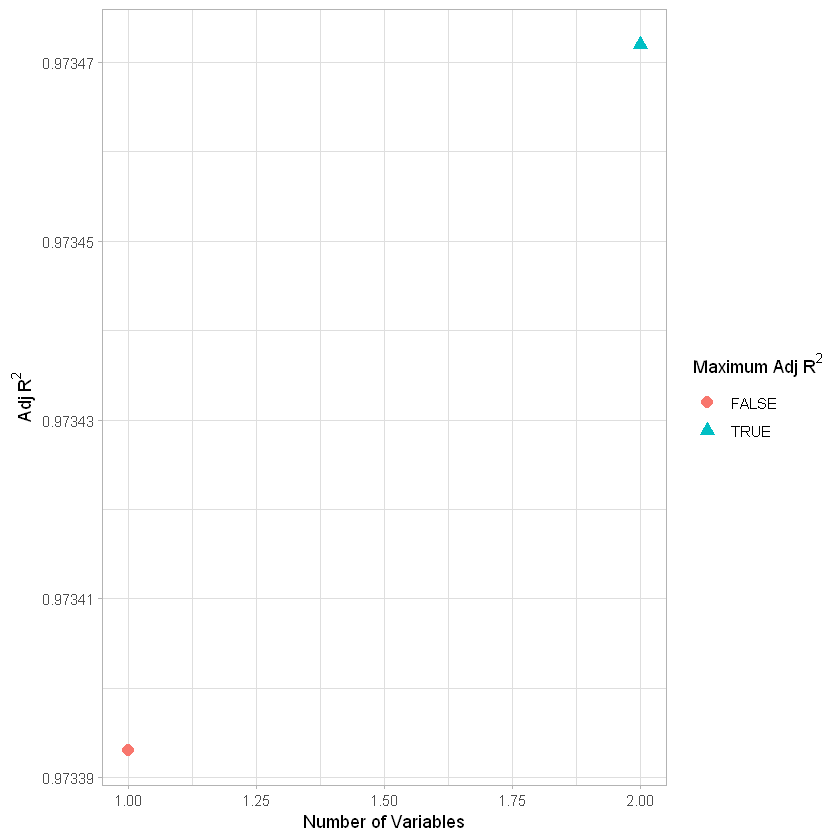

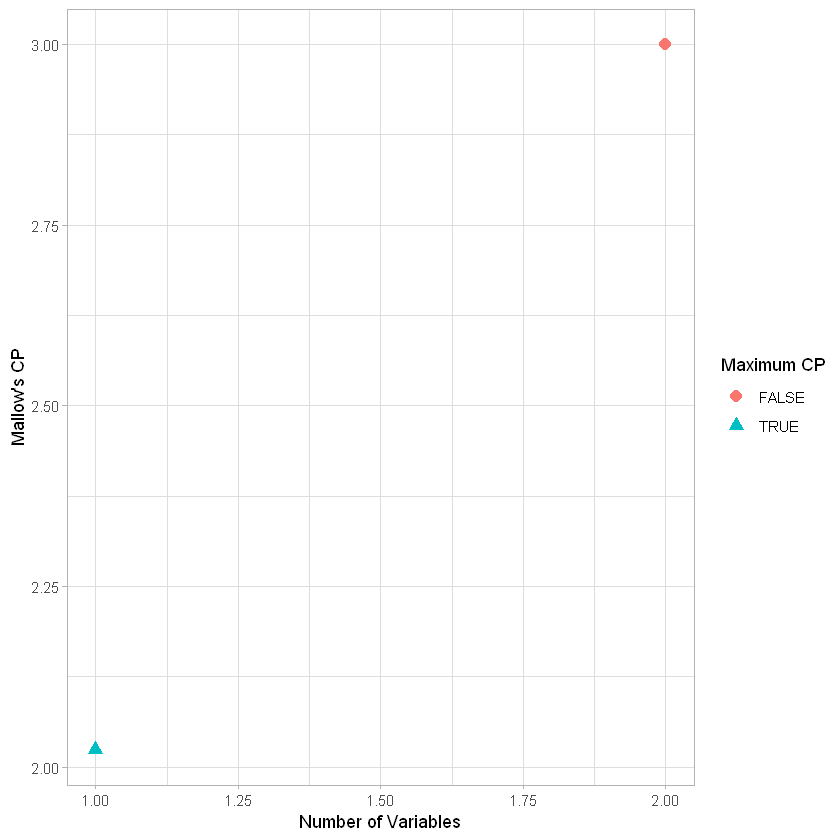

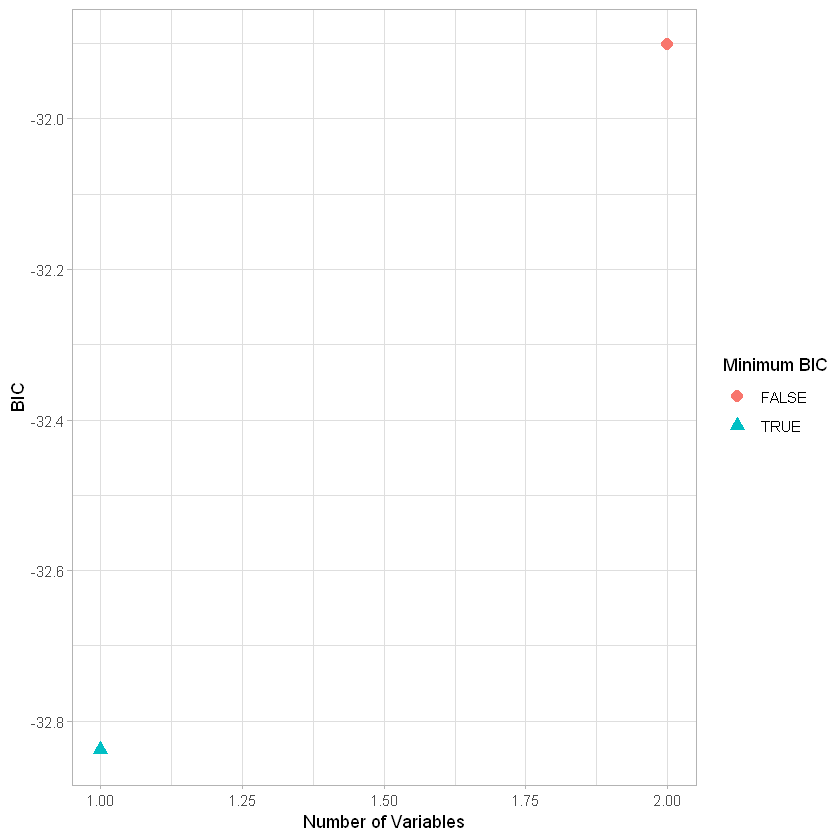

In [44]:
# Uncomment the model fit measures you want to look at. 

numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

# #rss
# rss.df <- data.frame(numvar = numvar, rss = reg.summary$rss, minrss = allfalse)
# rss.df$minrss[which.min(reg.summary$rss)] <- TRUE
# ggplot(rss.df,aes(x=numvar,y=rss,shape=minrss,col=minrss)) + 
#     geom_point(size=3) + theme_light() + 
#     labs(x = "Number of Variables", y = "RSS", color="Minimum RSS", shape="Minimum RSS")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# #mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# #bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

In [45]:
print(adjr2.df[1, 2])
print(cp.df[1, 2])
print(bic.df[1, 2])

[1] 0.9733931
[1] 2.023799
[1] -32.83851


> *Write your response here* 
> The 1-model term is better. The RSS increase is negligible, implying that as we add models, we don't get much better explanation for our data. Meanwhile, both cp and BIC measures point towards the first.

Coefficients:

adjr2 = 0.9733931
cp = 2.023799 
bic = -32.83851

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [38]:
# WRITE YOUR CODE HERE

regfit_fwd  = regsubsets(Y~., select(dat, c(X, Y, Epsilon)), method = "forward")
fwd_summ  <- summary(regfit_fwd)
fwd_summ

Subset selection object
Call: regsubsets.formula(Y ~ ., select(dat, c(X, Y, Epsilon)), method = "forward")
2 Variables  (and intercept)
        Forced in Forced out
X           FALSE      FALSE
Epsilon     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: forward
         X   Epsilon
1  ( 1 ) "*" " "    
2  ( 1 ) "*" "*"    

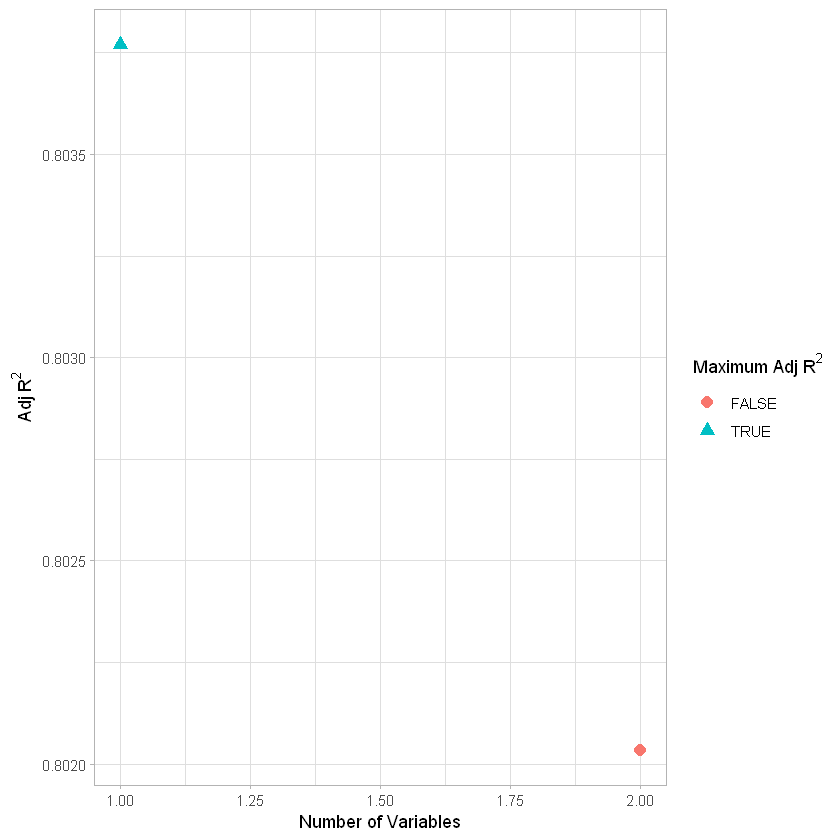

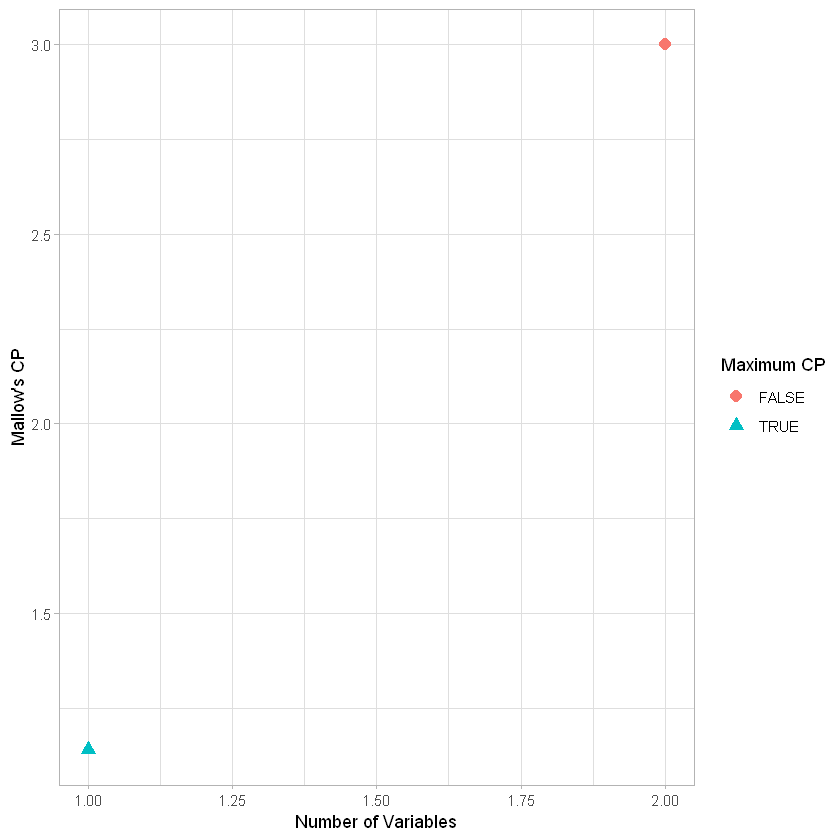

[1] 0.8037706
[1] 1.14041
[1] -154.652


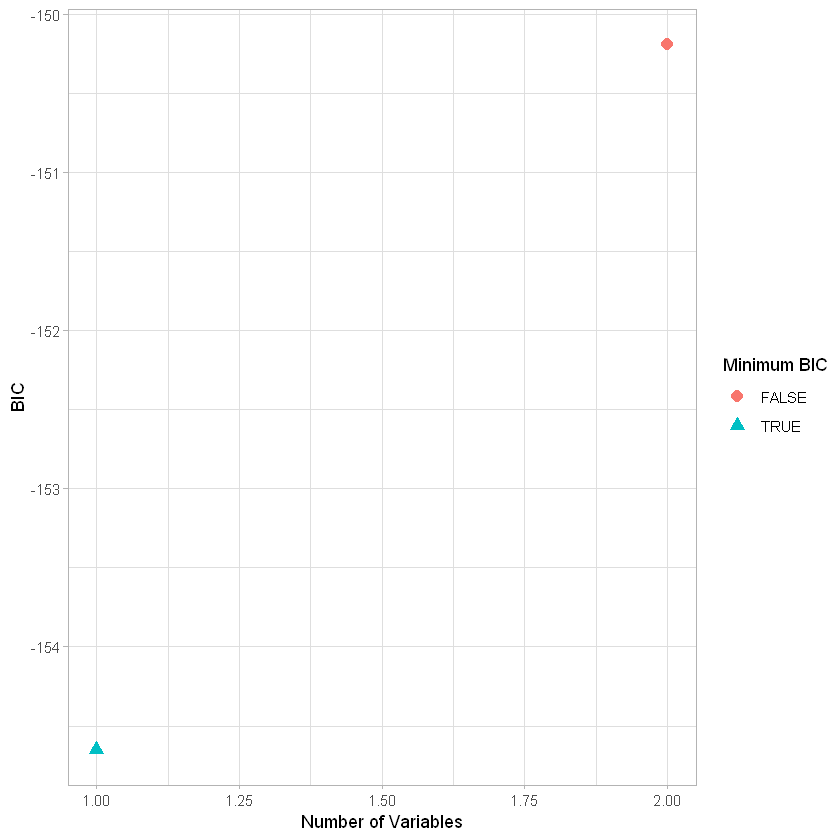

In [50]:
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- fwd_summ$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(fwd_summ$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# #mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- fwd_summ$cp, mincp <- allfalse)
cp.df$mincp[which.min(fwd_summ$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# #bic
bic.df <- data.frame(numvar = numvar,bic <- fwd_summ$bic, minbic <- allfalse)
bic.df$minbic[which.min(fwd_summ$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

print(adjr2.df[1, 2])
print(cp.df[1, 2])
print(bic.df[1, 2])

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

In [39]:
# WRITE YOUR CODE HERE
regfit_back  = regsubsets(Y~., select(dat, c(X, Y, Epsilon)), method = "backward")
back_summ  <- summary(regfit_back)
back_summ

Subset selection object
Call: regsubsets.formula(Y ~ ., select(dat, c(X, Y, Epsilon)), method = "backward")
2 Variables  (and intercept)
        Forced in Forced out
X           FALSE      FALSE
Epsilon     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: backward
         X   Epsilon
1  ( 1 ) "*" " "    
2  ( 1 ) "*" "*"    

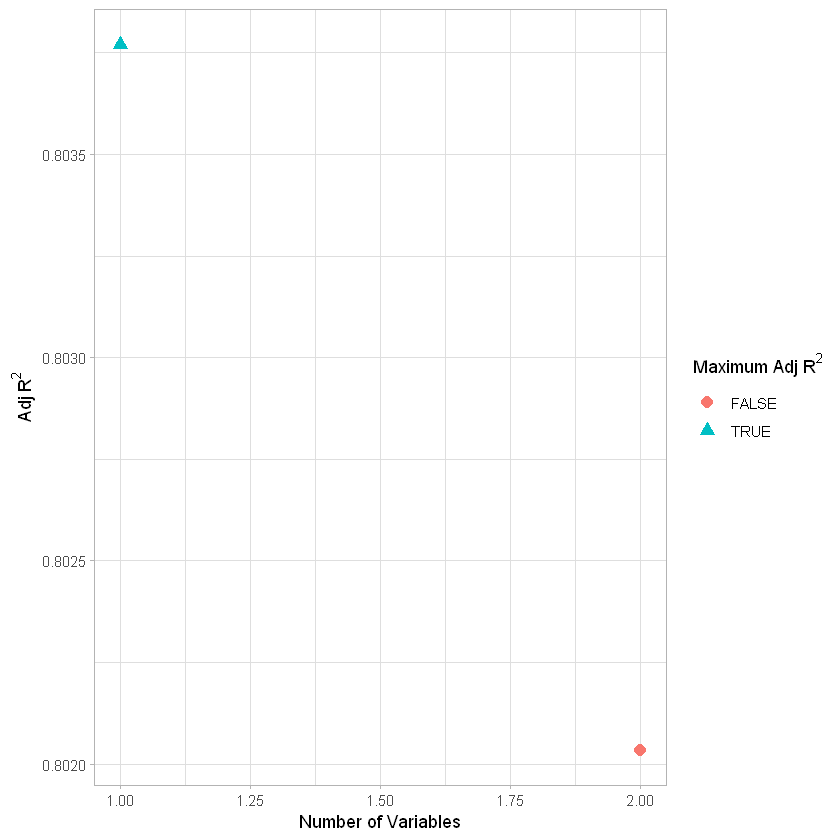

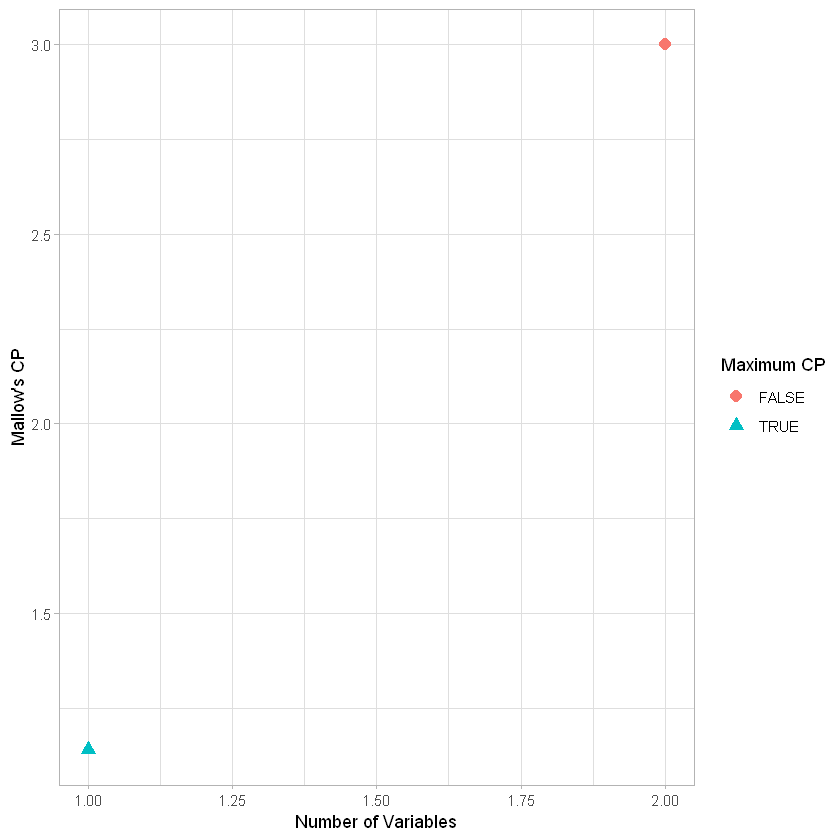

[1] 0.8037706
[1] 1.14041
[1] -154.652


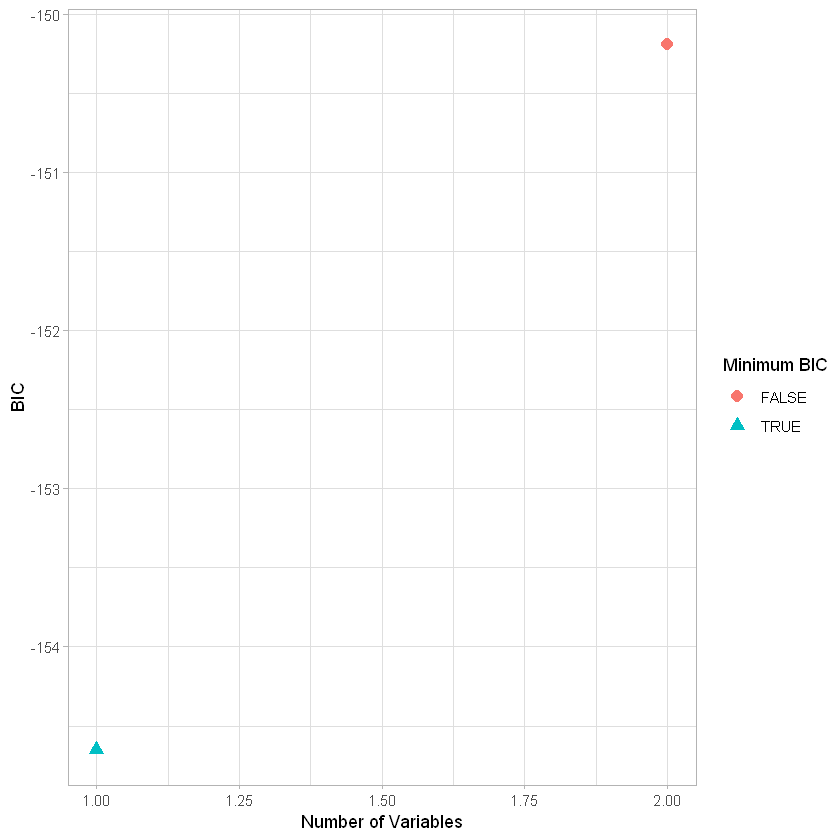

In [40]:
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- back_summ$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(back_summ$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# #mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- back_summ$cp, mincp <- allfalse)
cp.df$mincp[which.min(back_summ$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# #bic
bic.df <- data.frame(numvar = numvar,bic <- back_summ$bic, minbic <- allfalse)
bic.df$minbic[which.min(back_summ$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

print(adjr2.df[1, 2])
print(cp.df[1, 2])
print(bic.df[1, 2])

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> *Write your response here* 
> Results from part a & b return the same results, which makes sense because we're only giving it a 2x2 matrix to work off of. Again, this may be an issue with the noise generation.

But overall, RSS is lower in the parts a & b, meaning there is less variance. Which makes sense, we're giving it more data points. CP is lower in parts a & b, implying that there is better fit as n increases. BIC for parts a&b is actually much smaller, clearly establishing the higher-n models of forward and backwards selection as superior in this case.



[1] 0.9733931
[1] 2.023799
[1] -32.83851


[1] 0.8037706
[1] 1.14041
[1] -154.652


---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [93]:
output  <- data.frame()

X  <- rnorm(1000, mean = 0)
beta  <- rnorm(1000, mean = 0) #add elements that are exactly zero


p.stor  <- vector("list", 20)

for (p in p.stor)
    p.out = rnorm(1000, mean = 0)*rnorm(1000, mean = 0)
    e3.dat
    cbind(e3.dat, p.out)




,Y,X,Epsilon
,<dbl>,<dbl>,<dbl>
1,1.2174397,-1.0468744,0.6484584
2,-3.3928551,0.6659004,-2.2427811
3,0.4962175,0.8455693,0.6979098
4,1.2635113,0.5674881,0.6930269
5,0.4890591,-0.7697851,1.4706111
6,1.7408466,1.0897017,2.5109191


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [ ]:
# WRITE YOUR CODE HERE



c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
# WRITE YOUR CODE HERE



> *Write your response here* 
> 

**DUE:** 5pm EST, April 10, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*